In [2]:
!pip install xgboost

     -------------------------------------- 124.9/124.9 MB 2.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


In [5]:
# Load the dataset
data = pd.read_csv(r"C:\Users\GOD\Desktop\4-1\RiskAndFraudAnalytics\project\onlinefraud.csv") 


In [6]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04

In [8]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


#Distribution of "isfraud"

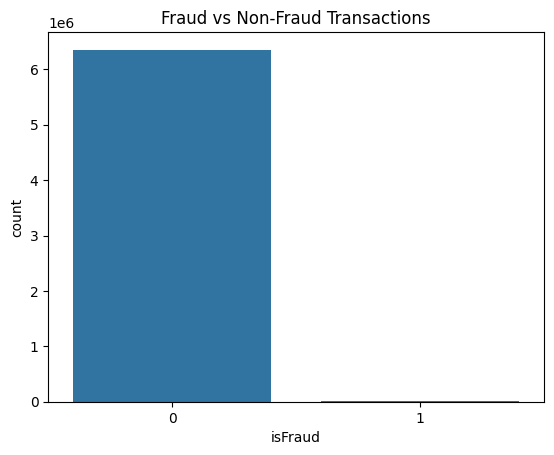

In [9]:
sns.countplot(x='isFraud', data=data)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

Distribution of Transaction types

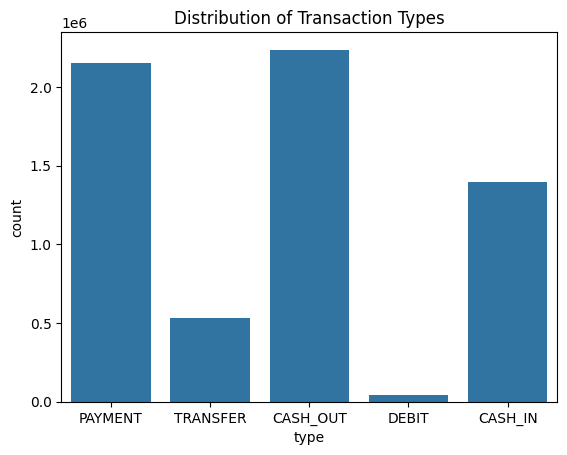

In [10]:
sns.countplot(x='type', data=data)
plt.title('Distribution of Transaction Types')
plt.show()

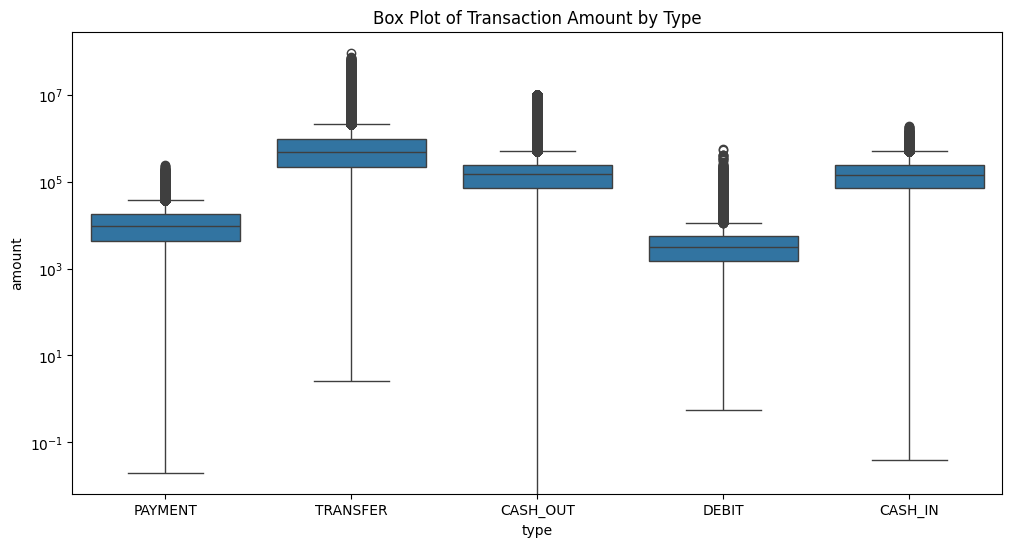

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='amount', data=data)
plt.yscale('log')  # Log scale can help visualize a wide range of values better
plt.title('Box Plot of Transaction Amount by Type')
plt.show()

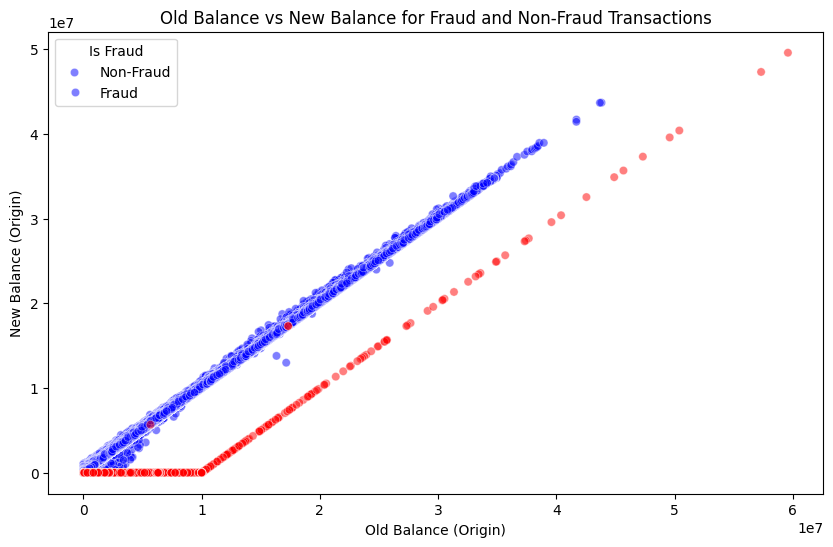

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=data, palette=['blue', 'red'], alpha=0.5)
plt.title('Old Balance vs New Balance for Fraud and Non-Fraud Transactions')
plt.xlabel('Old Balance (Origin)')
plt.ylabel('New Balance (Origin)')
plt.legend(title='Is Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()


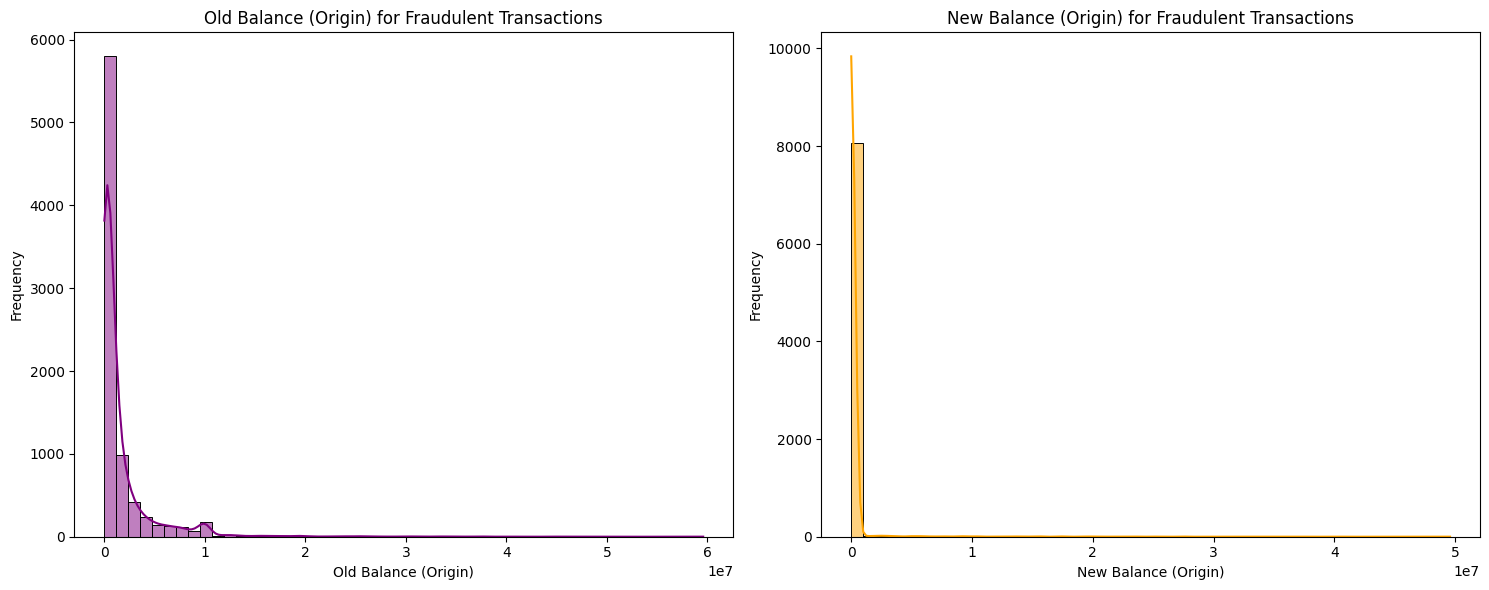

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(data[data['isFraud'] == 1]['oldbalanceOrg'], bins=50, color='purple', ax=ax[0], kde=True)
ax[0].set_title('Old Balance (Origin) for Fraudulent Transactions')
ax[0].set_xlabel('Old Balance (Origin)')
ax[0].set_ylabel('Frequency')

sns.histplot(data[data['isFraud'] == 1]['newbalanceOrig'], bins=50, color='orange', ax=ax[1], kde=True)
ax[1].set_title('New Balance (Origin) for Fraudulent Transactions')
ax[1].set_xlabel('New Balance (Origin)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Encode Categorical Variables

In [14]:
data['type'] = LabelEncoder().fit_transform(data['type'])

Drop irrelavant columns

In [15]:
data = data.drop(['nameOrig', 'nameDest'], axis=1, errors='ignore')


Feature Scaling

Correlation HeatMap

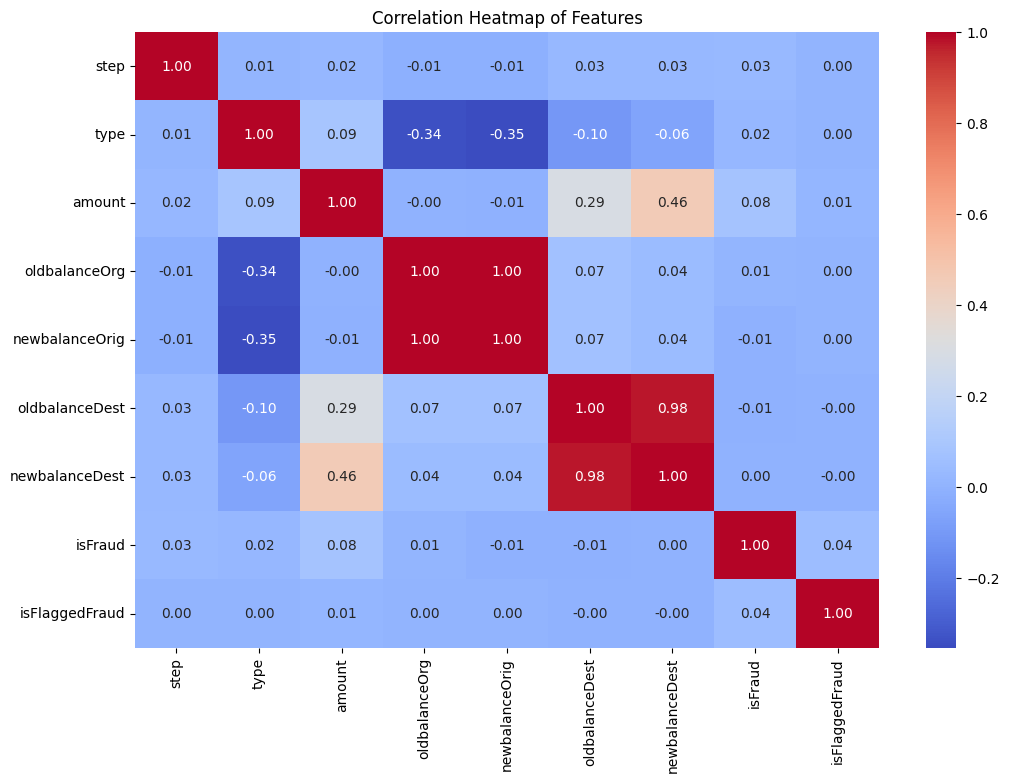

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [17]:
# Separate features and target variable
X = data.drop(['isFraud'], axis=1)
y = data['isFraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Model Training and Evaluation 
Logistic Regression

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.88      0.42      0.57      2435

    accuracy                           1.00   1908786
   macro avg       0.94      0.71      0.79   1908786
weighted avg       1.00      1.00      1.00   1908786



Artificial Neural Network (ANN)

In [19]:
# Define the ANN model
ann = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42)
ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)

print("ANN Results")
print(classification_report(y_test, y_pred_ann))

ANN Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.93      0.72      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.96      0.86      0.90   1908786
weighted avg       1.00      1.00      1.00   1908786



Random Forest Classifier

In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))


Random Forest Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.78      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



XGBoost Classifier

In [21]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results")
print(classification_report(y_test, y_pred_xgb))

c:\Users\GOD\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [01:02:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.85      0.90      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.92      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786



Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Results")
print(classification_report(y_test, y_pred_dt))

Decision Tree Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.89      0.87      0.88      2435

    accuracy                           1.00   1908786
   macro avg       0.94      0.94      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786



Confusion Matrix and Evaluation for Each Model

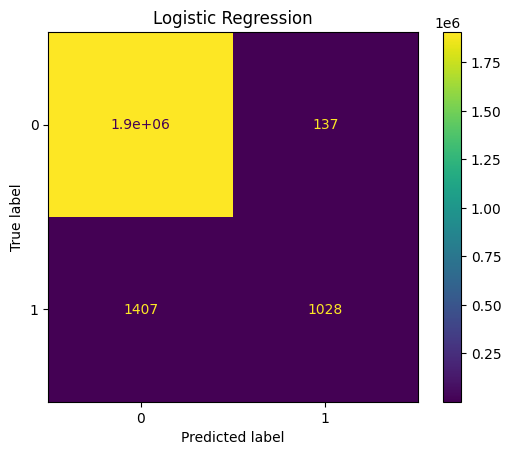

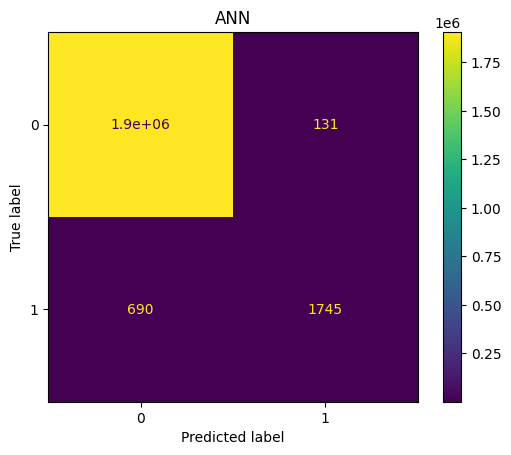

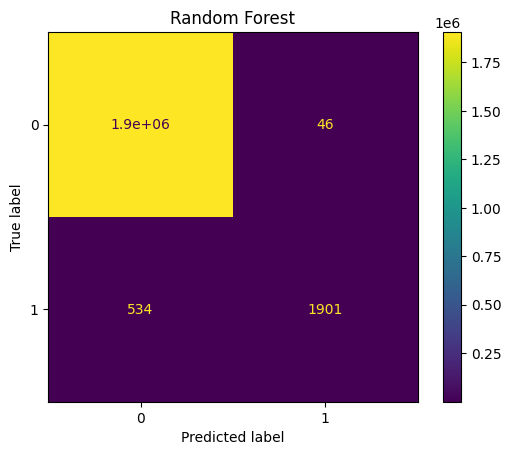

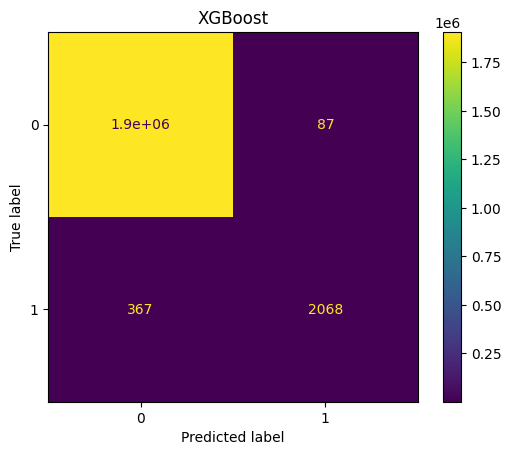

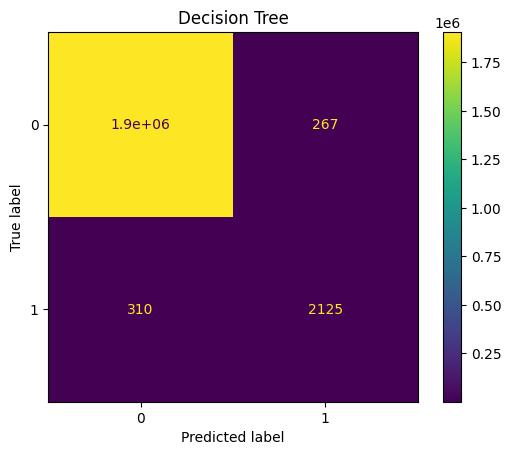

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(title)
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_ann, "ANN")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

Summarize and Compare Model Performance

In [27]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"ANN Accuracy: {accuracy_ann}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"Decision Tree Accuracy: {accuracy_dt}")


Logistic Regression Accuracy: 0.9991911089037745
ANN Accuracy: 0.9995698836852324
Random Forest Accuracy: 0.9996961419457184
XGBoost Accuracy: 0.999762152488545
Decision Tree Accuracy: 0.9996977136253095


C:\Users\GOD\AppData\Local\Temp\ipykernel_12648\3045156091.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='Blues_d')


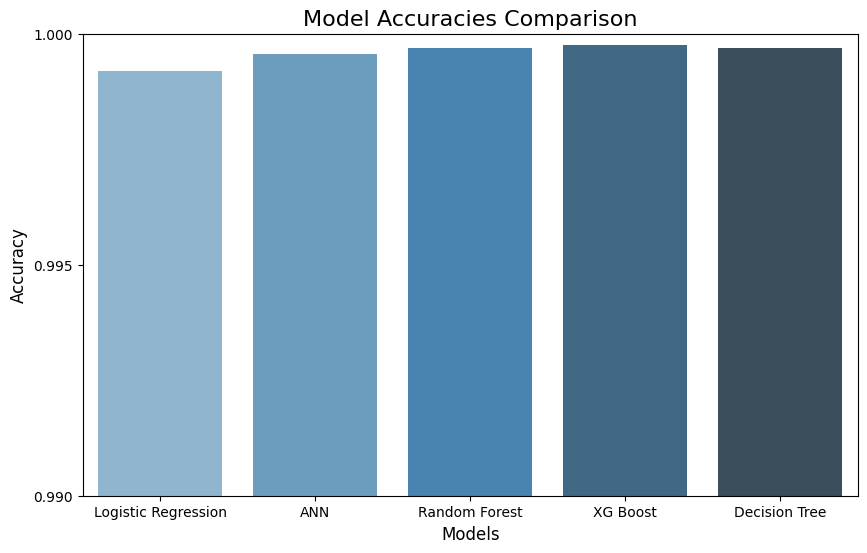

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
model_names = ['Logistic Regression', 'ANN', 'Random Forest', 'XG Boost', 'Decision Tree']
accuracies = [accuracy_lr, accuracy_ann, accuracy_rf, accuracy_xgb, accuracy_dt]  # Replace with your actual accuracies

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='Blues_d')

# Adding title and labels
plt.title('Model Accuracies Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Adjust y-axis limits and ticks for better accuracy comparison
plt.ylim(0.99, 1.00)  # Set y-axis range to focus on the accuracy range
plt.yticks([0.99, 0.995, 1.00])  # Customize y-ticks for clearer representation

# Show the plot
plt.show()
